In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
# Get the data for training and for building the submission
features_train = pd.read_csv('../data/raw/x_train_T9QMMVq.csv')
target_train = pd.read_csv('../data/raw/y_train_R0MqWmu.csv')
features_train.columns

Index(['ID', 'Humidity', 'M12', 'M13', 'M14', 'M15', 'M4', 'M5', 'M6', 'M7',
       'R', 'S1', 'S2', 'S3'],
      dtype='object')

# Correlation matrix

/home/jaime/miniconda3/envs/gas_challenge/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


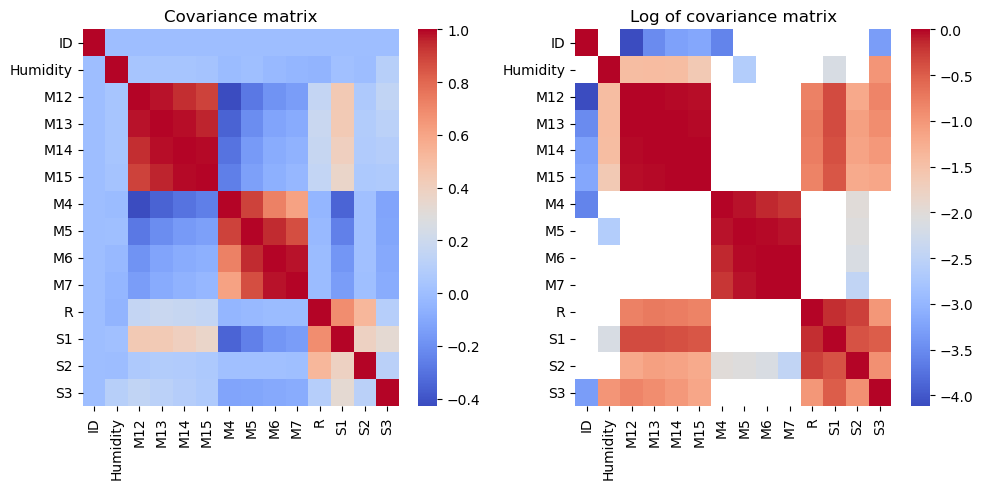

In [17]:
df_corr = features_train.corr()
df_corr_log = np.log10(df_corr)
f, ax = plt.subplots(1,2,figsize=(10,5))
_ = sns.heatmap(df_corr,ax=ax[0],cmap='coolwarm')
_ = sns.heatmap(df_corr_log,ax=ax[1],cmap='coolwarm')
ax[0].set_title('Covariance matrix')
ax[1].set_title('Log of covariance matrix')
f.tight_layout()
f.savefig('covariances_png')


In [21]:
block_1 = ['M12', 'M13', 'M14', 'M15']
block_2 = ['M4', 'M5', 'M6', 'M7']
block_3 = ['R', 'S1', 'S2', 'S3'] # Note that this last block is considerably looser than the rest

#### Colinear blocks!
Highly correlated entries can lead to overfitting, by encoding in different variables essentially the same information. There are 3 blocks of colinearity. 
We could train a whole model on the whole set of features, or train three models on the three colinearity blocks.

#### Effect on my models:
As I plan to use neural network or boosted trees, multicolinearity is not such a big problem. Remember, as long as you don't invert a matrix with colinear entries (as you do with linear methods), you don't get numerical instabilities. Still, could help to reduce the dimensionality, by summarizing at least two of the blocks in one or two variables each

# ICA 

([<matplotlib.axis.YTick at 0x7bbd3eb42990>,
 [Text(0, 0, 'ID'),
  Text(0, 1, 'Humidity'),
  Text(0, 2, 'M12'),
  Text(0, 3, 'M13'),
  Text(0, 4, 'M14'),
  Text(0, 5, 'M15'),
  Text(0, 6, 'M4'),
  Text(0, 7, 'M5'),
  Text(0, 8, 'M6'),
  Text(0, 9, 'M7'),
  Text(0, 10, 'R'),
  Text(0, 11, 'S1'),
  Text(0, 12, 'S2'),
  Text(0, 13, 'S3')])

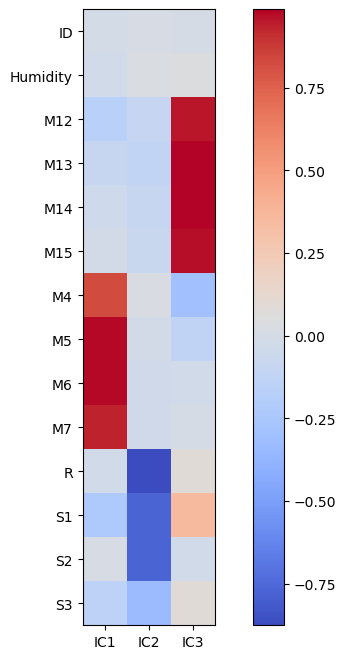

In [31]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_ica = scaler.fit_transform(features_train)

n_blocks=3
ica = FastICA(n_components=n_blocks, random_state=4471)
ica_results = ica.fit_transform(df_ica)
ica_matrix = ica.mixing_

plt.figure(figsize=(10, 8))
plt.imshow(ica_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(n_blocks), [f'IC{i+1}' for i in range(n_blocks)])
plt.yticks(range(len(features_train.columns)), features_train.columns)


#### Confirmed the presence of 3 independent signals, that are contained in the three blocks of the cov matrix. If standard training on all dataset is not enough, we will consider training only on the principal components of this blocks

In [32]:
# Now we look at the structure of the answers
target_train.head()

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,1,0.000000,0.0,0.176471,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.176471,0.0,0.0,0.176471,0.000000
2,2,0.128465,0.0,0.128465,0.128465,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128465,0.000000,0.0,0.0,0.128465,0.000000
3,3,0.000000,0.0,0.263736,0.263736,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.263736,0.263736
4,4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
